In [1]:
import pandas as pd
import numpy as np

In [2]:
# Cargar datos
# Nota: el archivo base_datos_revision.csv (que se genera en R) debe de estar en este mismo folder

df_revision=pd.read_csv('base_datos_revision.csv')
df_revision.head()

,Unnamed: 0,V1_new,primaryg_id,cluster,year,mean.pago_marginal,mean.no_empleados,mean.pago_final,var.pago_marginal,var.no_empleados,...,no.empleados_limite_inferior,no.emplados_limite_superior,no.emplados_media_primaryg_id,factor_escala_pago_final,ganancia_potencial,Revisar,group_tolerance.pago_marginal,group_tolerance.no_empleados,idsujeto,SUBACTIVIDAD
0,1,25,"1_(0,10]_2_within bounds",2,2020,165.264464,8.0,1310.8625,1508.917694,1.454545,...,6.0,6.75,6.587333,1.067607,88.623582,1,0.1,0.1,MOM942P5R,Comercio al por Menor ...
1,2,25,"1_(0,10]_2_within bounds",2,2020,165.264464,8.0,1310.8625,1508.917694,1.454545,...,6.0,6.75,6.587333,1.067607,88.623582,1,0.1,0.1,MOM942P5R,Comercio al por Menor ...
2,3,25,"1_(0,10]_2_within bounds",2,2020,165.264464,8.0,1310.8625,1508.917694,1.454545,...,6.0,6.75,6.587333,1.067607,88.623582,1,0.1,0.1,MOM942P5R,Comercio al por Menor ...
3,4,25,"1_(0,10]_2_within bounds",2,2020,165.264464,8.0,1310.8625,1508.917694,1.454545,...,6.0,6.75,6.587333,1.067607,88.623582,1,0.1,0.1,MOM942P5R,Comercio al por Menor ...
4,5,25,"1_(0,10]_2_within bounds",2,2020,165.264464,8.0,1310.8625,1508.917694,1.454545,...,6.0,6.75,6.587333,1.067607,88.623582,1,0.1,0.1,MOM942P5R,Comercio al por Menor ...


In [3]:
# Escoger datos correspondientes a los parámetros del modelo de clasificación

T_m=0.3
T_var=0.5
T_gm=0.1
T_gNE=0.1

df_revision_param=df_revision.loc[(df_revision['threshold_mean.pago_marginal']==T_m)&
               (df_revision['threshold_var.pago_marginal']==T_var)&
               (df_revision['group_tolerance.pago_marginal']==T_gm)&
               (df_revision['group_tolerance.no_empleados']==T_gNE)].copy()

boolean = df_revision_param.duplicated(subset=['V1_new']).any()
print(boolean, end='\n\n')

df_revision_param[
            ['V1_new','year',
             'Revisar','primaryg_id',
             'mean.pago_marginal','mean.no_empleados',
             'temporal_variation_type','factor_escala_pago_final']]


False



,V1_new,year,Revisar,primaryg_id,mean.pago_marginal,mean.no_empleados,temporal_variation_type,factor_escala_pago_final
4,25,2020,1,"1_(0,10]_2_within bounds",165.264464,8.000000,out of bounds,1.067607
29,26,2020,1,"1_(0,10]_2_within bounds",164.746903,8.833333,out of bounds,1.070961
94,58,2020,1,"1_(0,10]_2_out of bounds-higher payment",471.725500,4.250000,out of bounds,1.535559
289,61,2020,1,"1_(0,10]_2_within bounds",200.610202,5.416667,out of bounds,1.216123
609,64,2020,1,"1_(0,10]_2_out of bounds-higher payment",457.162125,4.833333,out of bounds,1.350233
...,...,...,...,...,...,...,...,...
1290876,4078,2020,1,"23_(10,50]_4_within bounds",191.829955,10.750000,out of bounds,1.042082
1290993,29706,2020,1,"24_(0,10]_22_within bounds",101.253750,1.000000,out of bounds,1.069341
1291806,37480,2020,1,"26_(10,50]_9_within bounds",416.368512,12.000000,out of bounds,1.096561
1292021,28435,2020,1,"30_(10,50]_4_within bounds",218.521975,10.333333,out of bounds,1.420507


In [4]:
# Extraer datos por sector económico

df_revision_sptep=df_revision_param.loc[df_revision['SUBACTIVIDAD'].str.startswith(
    'Servicios Profesionales, Técnicos, Especializados y Personales (')].copy()

df_revision_cm=df_revision_param.loc[df_revision['SUBACTIVIDAD'].str.startswith(
    'Comercio al por Mayor')].copy()

In [5]:
df_revision_sptep.columns

Index(['Unnamed: 0', 'V1_new', 'primaryg_id', 'cluster', 'year',
       'mean.pago_marginal', 'mean.no_empleados', 'mean.pago_final',
       'var.pago_marginal', 'var.no_empleados', 'var.pago_final',
       'empleados_bins', 'Zmean.pago_marginal', 'Zmean.no_empleados',
       'Zmean.pago_final', 'behavior_type', 'temporal_variation_type',
       'threshold_mean.pago_marginal', 'threshold_var.pago_marginal',
       'pago_marginal_limite_inferior', 'pago_marginal_limite_superior',
       'pago_marginal_media_primaryg_id', 'no.empleados_limite_inferior',
       'no.emplados_limite_superior', 'no.emplados_media_primaryg_id',
       'factor_escala_pago_final', 'ganancia_potencial', 'Revisar',
       'group_tolerance.pago_marginal', 'group_tolerance.no_empleados',
       'idsujeto', 'SUBACTIVIDAD'],
      dtype='object')

In [6]:
df_revision_sptep[['idsujeto','mean.pago_final','factor_escala_pago_final']]

,idsujeto,mean.pago_final,factor_escala_pago_final
503097,XJH412E7J,998.672500,1.969874
503548,JLJ465W2C,1329.300000,1.853421
503727,DVF864S8U,2468.012500,1.141273
503807,EGT186I3Z,684.180000,1.428125
504162,GKQ845F2G,156.485833,1.303459
...,...,...,...
810868,WQN187J7H,184.420000,1.060017
811128,ABE551W5P,547.867500,1.596139
811413,CAZ187V4Q,719.738750,1.507465
811998,SUO585V3A,8940.645000,1.350582


In [28]:
# Observar datos por primaryg_id

# id_list=df_revision_sptep['primaryg_id'].unique()

# df_revision_primary_id=df_revision_sptep[df_revision_sptep['primaryg_id']==id_list[0]]

id_list=df_revision_cm['primaryg_id'].unique()

df_revision_primary_id=df_revision_cm[df_revision_cm['primaryg_id']==id_list[0]]


print(id_list[0])
print(len(df_revision_primary_id))
df_revision_primary_id

2_(0,10]_2_out of bounds-higher payment
112


,Unnamed: 0,V1_new,primaryg_id,cluster,year,mean.pago_marginal,mean.no_empleados,mean.pago_final,var.pago_marginal,var.no_empleados,...,no.empleados_limite_inferior,no.emplados_limite_superior,no.emplados_media_primaryg_id,factor_escala_pago_final,ganancia_potencial,Revisar,group_tolerance.pago_marginal,group_tolerance.no_empleados,idsujeto,SUBACTIVIDAD
274673,274674,10,"2_(0,10]_2_out of bounds-higher payment",2,2020,398.240000,3.0,1194.720000,1.688453e+05,0.0,...,1.090909,2.0,1.754168,3.027149,2421.875003,1,0.1,0.1,VYJ444X6T,Comercio al por Mayor ...
275768,275769,166,"2_(0,10]_2_out of bounds-higher payment",2,2020,1407.030000,1.0,1407.030000,3.823234e+05,0.0,...,1.090909,2.0,1.754168,1.754168,1061.136928,1,0.1,0.1,YBA141Q8H,Comercio al por Mayor ...
278729,278730,597,"2_(0,10]_2_out of bounds-higher payment",2,2020,670.675000,1.0,670.675000,1.547876e+04,0.0,...,1.090909,2.0,1.754168,1.754168,505.801588,1,0.1,0.1,UGL341Z5I,Comercio al por Mayor ...
280049,280050,897,"2_(0,10]_2_out of bounds-higher payment",2,2020,427.238889,3.0,1281.716667,1.519352e+04,0.0,...,1.090909,2.0,1.754168,2.821681,2334.878337,1,0.1,0.1,WTK653G1K,Comercio al por Mayor ...
284546,284547,1974,"2_(0,10]_2_out of bounds-higher payment",2,2020,671.005714,1.0,671.005714,8.003916e+05,0.0,...,1.090909,2.0,1.754168,1.754168,506.051003,1,0.1,0.1,KXT776I5U,Comercio al por Mayor ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487927,487928,43743,"2_(0,10]_2_out of bounds-higher payment",2,2020,11928.517500,1.0,11928.517500,1.041803e+08,0.0,...,1.090909,2.0,1.754168,1.754168,8996.105564,1,0.1,0.1,UVL331Q5W,Comercio al por Mayor ...
490509,490510,44209,"2_(0,10]_2_out of bounds-higher payment",2,2020,843.750000,1.0,843.750000,3.515625e+04,0.0,...,1.090909,2.0,1.754168,1.754168,636.329206,1,0.1,0.1,XBF325K1L,Comercio al por Mayor ...
495054,495055,45138,"2_(0,10]_2_out of bounds-higher payment",2,2020,5121.570000,1.0,5121.570000,1.081369e+07,0.0,...,1.090909,2.0,1.754168,1.754168,3862.523937,1,0.1,0.1,SKT721B3R,Comercio al por Mayor ...
497754,497755,46857,"2_(0,10]_2_out of bounds-higher payment",2,2020,402.686667,3.0,1208.060000,5.913819e+04,0.0,...,1.090909,2.0,1.754168,2.993721,2408.535003,1,0.1,0.1,KME624Z3K,Comercio al por Mayor ...


# Correr simulación

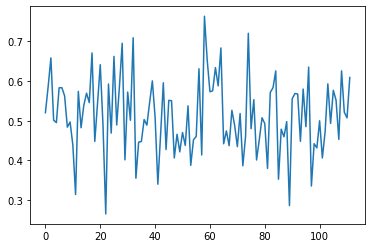

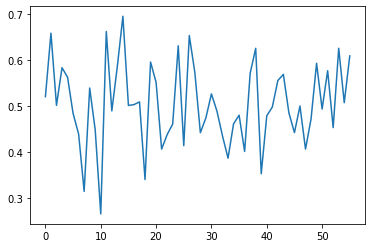

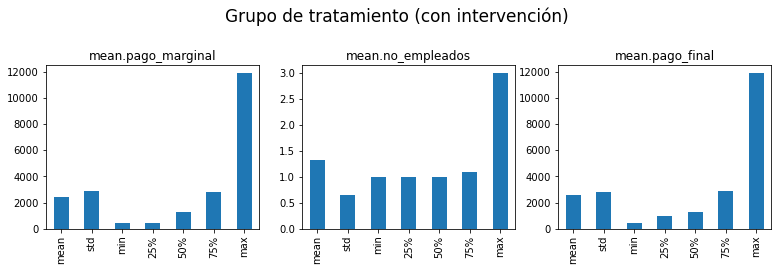

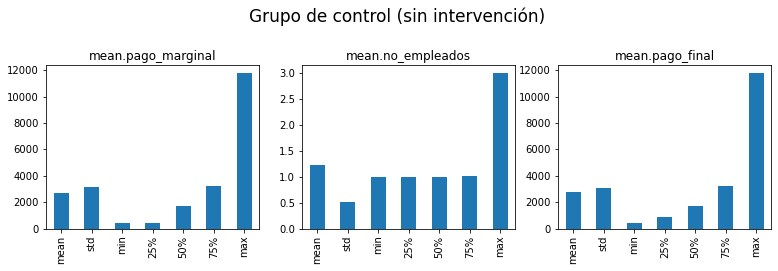

,idsujeto,b0,dummy_carta,mean.pago_marginal,mean.no_empleados,mean.pago_final,factor_escala_pago_final,random_gain_factor,random_gain,ganancia_potencial_rand
274673,VYJ444X6T,1,1,398.240000,3.0,1194.720000,3.027149,0.520075,1259.555461,2454.275461
275768,YBA141Q8H,1,0,1407.030000,1.0,1407.030000,1.754168,0.585937,0.000000,1407.030000
278729,UGL341Z5I,1,1,670.675000,1.0,670.675000,1.754168,0.657947,332.790592,1003.465592
280049,WTK653G1K,1,1,427.238889,3.0,1281.716667,2.821681,0.501235,1170.323764,2452.040430
284546,KXT776I5U,1,0,671.005714,1.0,671.005714,1.754168,0.495172,0.000000,671.005714
...,...,...,...,...,...,...,...,...,...,...
487927,UVL331Q5W,1,1,11928.517500,1.0,11928.517500,1.754168,0.452976,4075.019613,16003.537113
490509,XBF325K1L,1,1,843.750000,1.0,843.750000,1.754168,0.625284,397.886240,1241.636240
495054,SKT721B3R,1,0,5121.570000,1.0,5121.570000,1.754168,0.521257,0.000000,5121.570000
497754,KME624Z3K,1,1,402.686667,3.0,1208.060000,2.993721,0.507067,1221.289077,2429.349077


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Establecer una semilla para la generación de números aleatorios para reproducibilidad
np.random.seed(9001)

# Copiar un DataFrame llamado df_revision_primary_id en df (suponiendo que df_revision_primary_id está definido en otro lugar)
df=df_revision_primary_id.copy()

# Comprobar si la longitud del DataFrame df es mayor que 1
if len(df) > 1:
    
    # Generar números aleatorios distribuidos normalmente
    random_numbers = np.random.normal(loc=0.5, scale=0.1, size=len(df))
    
    # Agregar una columna 'random_gain_factor' al DataFrame df, que contiene los números aleatorios generados
    df['random_gain_factor'] = random_numbers
    
    # Trazar los números aleatorios generados
    plt.plot(random_numbers)
    plt.show()
    
    # Agregar columnas al DataFrame df llamadas 'b0' y 'dummy_carta'
    df['b0'] = 1
    df['dummy_carta'] = np.random.randint(2, size=len(df))  # Llenar 'dummy_carta' con números enteros aleatorios 0 o 1
    
    # Calcular una columna llamada 'random_gain' en función de los datos del DataFrame y los números aleatorios generados
    df['random_gain'] = df['mean.pago_final'] * ((df['factor_escala_pago_final'] - 1) * df['random_gain_factor']) * df['dummy_carta']
    
    # Calcular una columna adicional llamada 'ganancia_potencial_rand' basada en datos del DataFrame y la columna 'random_gain'
    df['ganancia_potencial_rand'] = df['mean.pago_final'] + df['random_gain']
    
    # Trazar una gráfica basada en los factores aleatorios generados en función de 'dummy_carta'
    plt.plot(df['random_gain_factor'].loc[df['dummy_carta']==1].values)
    plt.show()
    
    # Realizar estadísticas descriptivas sobre subconjuntos del DataFrame, dependiendo del valor de 'dummy_carta'
    df_describe_1 = df.loc[df['dummy_carta'] == 1][['mean.pago_marginal', 'mean.no_empleados', 'mean.pago_final']].describe(percentiles=None)
    df_describe_0 = df.loc[df['dummy_carta'] == 0][['mean.pago_marginal', 'mean.no_empleados', 'mean.pago_final']].describe(percentiles=None)
    
    # Crear subgráficos con estadísticas descriptivas utilizando Matplotlib
    fig, axs = plt.subplots(1, 3, figsize=(13, 3))
    for i, col in enumerate(df_describe_1.columns):
        plt.sca(axs[i])
        df_describe_1[df_describe_1.columns[i]][1:].plot(kind='bar')
        plt.title(col)
    plt.suptitle('Grupo de tratamiento (con intervención)', y=1.15, fontsize=17)
    plt.show()
    
    fig, axs = plt.subplots(1, 3, figsize=(13, 3))
    for i, col in enumerate(df_describe_0.columns):
        plt.sca(axs[i])
        df_describe_0[df_describe_0.columns[i]][1:].plot(kind='bar')
        plt.title(col)
    plt.suptitle('Grupo de control (sin intervención)', y=1.15, fontsize=17)
    plt.show()

# Imprimir una selección de columnas del DataFrame df
df[['idsujeto', 'b0', 'dummy_carta', 'mean.pago_marginal', 'mean.no_empleados', 'mean.pago_final', 'factor_escala_pago_final', 'random_gain_factor', 'random_gain', 'ganancia_potencial_rand']]


# Regresión OLS

In [30]:
import statsmodels.api as sm

# Definir las variables independientes (predictoras) para el modelo de regresión
# Seleccionar las columnas relevantes del DataFrame df como variables independientes
# Las variables independientes pueden variar dependiendo de qué columnas están siendo utilizadas en el análisis

# Enfoque 1: Incluir una columna de intercepto ('b0'), 'dummy_carta', 'mean.pago_marginal' y 'mean.no_empleados'
X = df[['b0', 'dummy_carta', 'mean.pago_marginal', 'mean.no_empleados']]

# Enfoque 2: Excluir la columna de intercepto ('b0') y solo incluir 'dummy_carta', 'mean.pago_marginal' y 'mean.no_empleados'
#X = df[['dummy_carta', 'mean.pago_marginal', 'mean.no_empleados']]

# Enfoque 3: Incluir 'dummy_carta', 'mean.pago_final' y 'mean.no_empleados'
#X = df[['dummy_carta', 'mean.pago_final', 'mean.no_empleados']]

# Definir la variable dependiente (respuesta) para el modelo de regresión
# Seleccionar la columna relevante del DataFrame df como variable dependiente
# La variable dependiente puede variar dependiendo de qué columna se está utilizando en el análisis

# Utilizar 'random_gain' como variable dependiente
#Y = df['random_gain']

# Utilizar 'ganancia_potencial_rand' como variable dependiente
Y = df['ganancia_potencial_rand']

# Crear un modelo de regresión lineal ordinaria (OLS)
model = sm.OLS(Y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Imprimir un resumen del modelo ajustado que incluye estadísticas importantes como coeficientes, errores estándar, valores p, etc.
print(results.summary())


                               OLS Regression Results                              
Dep. Variable:     ganancia_potencial_rand   R-squared:                       0.972
Model:                                 OLS   Adj. R-squared:                  0.972
Method:                      Least Squares   F-statistic:                     1268.
Date:                     Fri, 29 Mar 2024   Prob (F-statistic):           5.29e-84
Time:                             13:47:46   Log-Likelihood:                -870.46
No. Observations:                      112   AIC:                             1749.
Df Residuals:                          108   BIC:                             1760.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [32]:
import statsmodels.api as sm

# Definir las variables independientes (predictoras) para el modelo de regresión
# Seleccionar las columnas relevantes del DataFrame df como variables independientes
# Las variables independientes pueden variar dependiendo de qué columnas están siendo utilizadas en el análisis

# Enfoque 1: Incluir una columna de intercepto ('b0'), 'dummy_carta', 'mean.pago_marginal' y 'mean.no_empleados'
X = df[['b0', 'dummy_carta', 'mean.pago_marginal', 'mean.no_empleados']]

# Enfoque 2: Excluir la columna de intercepto ('b0') y solo incluir 'dummy_carta', 'mean.pago_marginal' y 'mean.no_empleados'
#X = df[['dummy_carta', 'mean.pago_marginal', 'mean.no_empleados']]

# Enfoque 3: Incluir 'dummy_carta', 'mean.pago_final' y 'mean.no_empleados'
#X = df[['dummy_carta', 'mean.pago_final', 'mean.no_empleados']]

# Definir la variable dependiente (respuesta) para el modelo de regresión
# Seleccionar la columna relevante del DataFrame df como variable dependiente
# La variable dependiente puede variar dependiendo de qué columna se está utilizando en el análisis

# Utilizar 'random_gain' como variable dependiente
Y = df['random_gain']

# Utilizar 'ganancia_potencial_rand' como variable dependiente
#Y = df['ganancia_potencial_rand']

# Crear un modelo de regresión lineal ordinaria (OLS)
model = sm.OLS(Y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Imprimir un resumen del modelo ajustado que incluye estadísticas importantes como coeficientes, errores estándar, valores p, etc.
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            random_gain   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     59.46
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           8.91e-23
Time:                        14:15:10   Log-Likelihood:                -870.39
No. Observations:                 112   AIC:                             1749.
Df Residuals:                     108   BIC:                             1760.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
b0                  -745.2740    166